In [4]:
# Imports from SCSF module
from sys import path
path.append('..')
from clearsky.main import IterativeClearSky
from clearsky.utilities import CONFIG1, progress
import os

In [8]:
ics = IterativeClearSky()
ics.load_instance('bootstrap_test_02/original.scsf')

In [7]:
files = os.listdir('bootstrap_test_02/')
num_f = len(files)

In [11]:
M = np.empty((num_f, ics.D.size))

In [12]:
M.shape

(103, 584064)

In [18]:
for it, fn in enumerate(files):
    progress(it, num_f, fn)
    ics.load_instance('bootstrap_test_02/' + fn)
    cs = (ics.L_cs.value.dot(ics.R_cs.value)).ravel(order='F')
    M[it] = cs
else:
    ics.load_instance('bootstrap_test_02/original.scsf')
    progress(it+1, num_f, 'done!            ')

In [19]:
cs = (ics.L_cs.value.dot(ics.R_cs.value)).ravel(order='F')

In [22]:
low = np.percentile(M, 5, axis=0)
high = np.percentile(M, 95, axis=0)

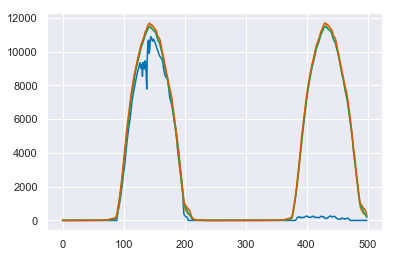

In [24]:
plt.plot(ics.D.ravel(order='F')[:500])
plt.plot(cs[:500])
plt.plot(low[:500])
plt.plot(high[:500])

/Users/bennetmeyers/.virtualenvs/clearsky/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


(0, 4)

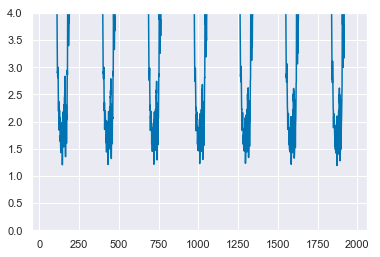

In [30]:
N = 2000
plt.plot(100 * (high[:N] - low[:N])/ cs[:N])
plt.ylim(0, 4)

In [32]:
R = (100 * (high - low)/ cs).reshape(288, -1, order='F')

/Users/bennetmeyers/.virtualenvs/clearsky/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


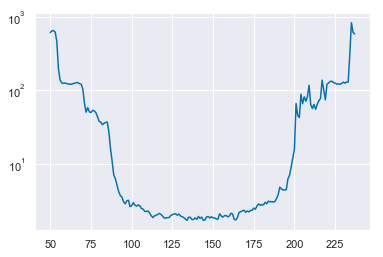

In [36]:
plt.plot(np.arange(R.shape[0]), np.average(R, axis=1))
plt.yscale('log')